In [2]:
import pandas as pd

df = pd.read_csv('data.csv')

print(df.head())
print(df.dtypes) 

print(df.describe())

         filename       tempo  beats  chroma_stft      rmse  \
0  blues.00081.au  103.359375     50     0.380260  0.248262   
1  blues.00022.au   95.703125     44     0.306451  0.113475   
2  blues.00031.au  151.999081     75     0.253487  0.151571   
3  blues.00012.au  184.570312     91     0.269320  0.119072   
4  blues.00056.au  161.499023     74     0.391059  0.137728   

   spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0        2116.942959         1956.611056  4196.107960            0.127272   
1        1156.070496         1497.668176  2170.053545            0.058613   
2        1331.073970         1973.643437  2900.174130            0.042967   
3        1361.045467         1567.804596  2739.625101            0.069124   
4        1811.076084         2052.332563  3927.809582            0.075480   

        mfcc1  ...     mfcc12     mfcc13    mfcc14    mfcc15    mfcc16  \
0  -26.929785  ...  14.336612 -13.821769  7.562789 -6.181372  0.330165   
1 -233.860

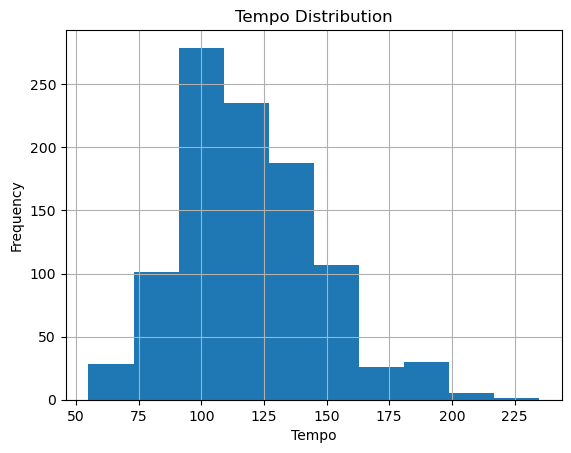

In [4]:
import matplotlib.pyplot as plt

df['tempo'].hist()
plt.title('Tempo Distribution')
plt.xlabel('Tempo')
plt.ylabel('Frequency')
plt.show()

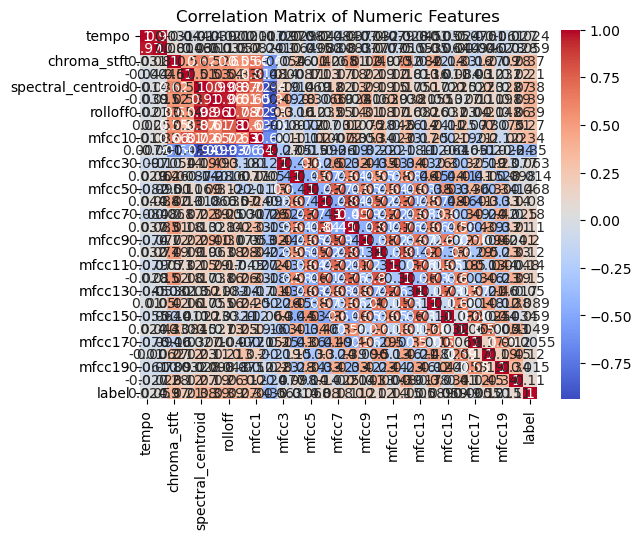

In [9]:
import seaborn as sns

numeric_cols = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

X = df.drop(['filename', 'label'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
probabilities = model.predict_proba(X_test)
log_loss_value = log_loss(y_test, probabilities)
print(f'Log Loss: {log_loss_value}')

Log Loss: 1.2431580397129653


In [15]:
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, model.predict(X_test)))

print(confusion_matrix(y_test, model.predict(X_test)))

Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        20
           1       0.81      1.00      0.90        13
           2       0.43      0.48      0.46        27
           3       0.80      0.38      0.52        21
           4       0.38      0.60      0.46        15
           5       0.55      0.50      0.52        22
           6       0.75      0.84      0.79        25
           7       0.61      0.85      0.71        13
           8       0.53      0.39      0.45        23
           9       0.24      0.19      0.21        21

    accuracy                           0.56       200
   macro avg       0.57      0.59      0.57       200
weighted avg       0.57      0.56      0.55       200

[[13  0  2  1  1  1  2  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 2  0 13  0  3  5  0  1  1  2]
 [ 0  0  1  8  2  0  0  4  1  5]
 [ 0  0  1  1  9  0  0  1  2  1]
 [ 1  3  4  0  1 11  0  0  1  1]
 [ 0  0  0  0  2  0 21  0  0